# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [6]:
!pip3 install -q otter-grader

In [7]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        if isinstance(kernel_size, int):
          self.w = torch.rand(out_channels, in_channels, kernel_size, kernel_size)
        else:
          self.w = torch.rand(out_channels, in_channels, kernel_size[0], kernel_size[1])
        # Bias should have shape [out_channels] 
        self.b = torch.zeros(out_channels)
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.bias = bias
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass      
        #forwards pass
        N, C, H, W = x.shape
        F, C, H_prime, W_prime = self.w.shape
        stride = self.stride
        padding = self.padding
        
        if isinstance(self.kernel_size, int):
          kernel_x = self.kernel_size
          kernel_y = self.kernel_size
        else:
          kernel_x = self.kernel_size[0]
          kernel_y = self.kernel_size[1]

        if isinstance(self.stride, int):
          stride_x = self.stride
          stride_y = self.stride
        else:
          stride_x = self.stride[0]
          stride_y = self.stride[1]

        if isinstance(self.padding, int):
          padding_x = self.padding
          padding_y = self.padding
        else:
          padding_x = self.padding[0]
          padding_y = self.padding[1]

        out = torch.zeros(N, F, int((H + 2*padding_x - kernel_x)/stride_x + 1), int((W + 2*padding_y - kernel_y)/stride_y + 1))
          
        inp_unf = torch.nn.functional.unfold(x, (kernel_x, kernel_y), stride = (stride_x,stride_y), padding = (padding_x,padding_y))
        out_unf = inp_unf.transpose(1, 2).matmul(self.w.view(self.w.size(0), -1).t()).transpose(1, 2)

        if self.bias:
          out_unf = out_unf + self.b.view(-1,1)

        out = torch.nn.functional.fold(out_unf, (int((H + 2*padding_x - kernel_x)/stride_x + 1), int((W + 2*padding_y - kernel_y)/stride_y + 1)), (1, 1))
        out2 = torch.nn.functional.conv2d(x, self.w, self.b, stride = self.stride, padding = self.padding)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out 

In [9]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ...
        self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if isinstance(self.kernel_size, int):
            kernel_x = self.kernel_size
            kernel_y = self.kernel_size
        else:
            kernel_x = self.kernel_size[0]
            kernel_y = self.kernel_size[1]
        
        out = torch.zeros(x.shape[0], x.shape[1], int((x.shape[2]-kernel_x)/kernel_x + 1), int((x.shape[3]-kernel_y)/kernel_y) + 1)
        inp_unf = torch.nn.functional.unfold(x, (kernel_x, kernel_y), stride=(kernel_x, kernel_y), padding=(0, 0))
        out_unf = inp_unf.view(x.shape[0],x.shape[1],int(inp_unf.shape[1]/x.shape[1]),-1).max(dim=2)[0]

        out = torch.nn.functional.fold(out_unf, (int((x.shape[2]-kernel_x)/kernel_x + 1), int((x.shape[3]-kernel_y)/kernel_y) + 1), (1, 1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [12]:
# pool of square window of size=3, stride=2
# pool of non-square window
m = nn.MaxPool2d(3)

input = torch.randn((10,3,64,64))
criterion = nn.MSELoss()

output = m(input)
print('Orig output', output.shape)
y = MaxPool2d(3)(input)
loss = torch.sqrt(criterion(output, y))
print(loss)


Orig output torch.Size([10, 3, 21, 21])
tensor(0.)


In [13]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [14]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros(in_channels, out_channels)
        self.b = torch.zeros(out_channels)
        self.bias = bias
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ...
        
        out = torch.matmul(x, self.w) 
        if self.bias:
            out = out + self.b
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [15]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [16]:
class BatchNorm2d(nn.Module):
	def __init__(self, num_features, eps=1e-05, momentum=0.1):
		super(BatchNorm2d, self).__init__()
		"""
		An implementation of a Batch Normalization over a mini-batch of 2D inputs.

		The mean and standard-deviation are calculated per-dimension over the
		mini-batches and gamma and beta are learnable parameter vectors of
		size num_features.

		Parameters:
		- num_features: C from an expected input of size (N, C, H, W).
		- eps: a value added to the denominator for numerical stability. Default: 1e-5
		- momentum: the value used for the running_mean and running_var
		computation. Default: 0.1 . (i.e. 1-momentum for running mean)
		- gamma: the learnable weights of shape (num_features).
		- beta: the learnable bias of the module of shape (num_features).
		"""
		# TODO: Define the parameters used in the forward pass                 #
		# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
		self.num_features = num_features
		self.eps = eps
		self.momentum = momentum
		
		self.running_mean = torch.zeros(num_features)
		self.running_var = torch.zeros(num_features)

		# self.register_parameter is not used as it was mentioned on piazza
		# that this will be overridden
		self.gamma = torch.ones(num_features)
		self.beta = torch.zeros(num_features)
		...
		# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

	def forward(self, x):
		"""
		During training this layer keeps running estimates of its computed mean and
		variance, which are then used for normalization during evaluation.
		Input:
		- x: Input data of shape (N, C, H, W)
		Output:
		- out: Output data of shape (N, C, H, W) (same shape as input)
		"""
		# TODO: Implement the forward pass                                     #
		#       (be aware of the difference for training and testing)          #
		# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
		...
		if self.training:
			mean = x.mean(dim=(0, 2, 3), keepdim=True)
			mean_dim = x.mean(dim = (0, 2, 3), keepdim = False)
			var = x.var(dim=(0, 2, 3), keepdim=True)
			var_dim = x.var(dim = (0, 2, 3), keepdim = False)
			self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean_dim
			self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var_dim
		else:
			mean = self.running_mean[None,:,None,None]
			var = self.running_var[None,:,None,None]
		out = (x - mean) / torch.sqrt(var + self.eps)
		out = self.gamma[None,:,None,None] * out + self.beta[None,:,None,None]

		return out

In [23]:
random = torch.rand((3,100,7,6))
C = torch.nn.BatchNorm2d(num_features = 100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
criterion = nn.MSELoss()
x = C(random)
y = BatchNorm2d(100)(random)
loss = torch.sqrt(criterion(x, y))
print(loss)

tensor(0.0040, grad_fn=<SqrtBackward0>)


In [18]:
x = torch.arange(16).view(4,4).float()
x = torch.stack([x,x],dim=0)
x = x.view(1,2,4,4)
y = torch.ones(4,4)
y[1,:]=2
y[2,:]=3
y[3,:]=4
y = torch.stack([y,y],dim=0)
y = y.view(1,2,4,4)
z = torch.stack([x,y],dim=0).view(2,2,4,4)

In [ ]:
grader.check("BatchNorm Layer")

In [26]:
input=torch.randn(40,100,20,15)
real=nn.BatchNorm2d(num_features = 100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
bn=BatchNorm2d(num_features=100)
out=bn.forward(input)
ans=real(input)
criterion = nn.MSELoss()
loss = torch.sqrt(criterion(out, ans))
print(loss)


tensor(4.1673e-05, grad_fn=<SqrtBackward0>)


tensor(39.9176, grad_fn=<SumBackward0>)

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [15]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2023-01-30 00:35:10--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1.1’

NaturalImageNetTest 100%[===================>] 132.09M  5.72MB/s    in 26s     

2023-01-30 00:35:38 (5.09 MB/s) - ‘NaturalImageNetTest.zip?download=1.1’ saved [138507970/138507970]

--2023-01-30 00:35:38--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1.1’

NaturalImageNetTrai 100%[===================>]   1.29G  4.55MB/s  

In [27]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [68]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

ON_COLAB = False

transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )

transform1 = transforms.Compose(
            [ 
        transforms.Resize(256),  
        transforms.CenterCrop(256),  
        transforms.ColorJitter(brightness=0.15),  
        transforms.RandomRotation(
            degrees=45
        ), 
        transforms.RandomHorizontalFlip(
            p=0.5
        ), 
        transforms.RandomVerticalFlip(
            p=0.05
        ),  
        transforms.ToTensor(), 
        transforms.Normalize(
            mean=mean, std=std
        ),  
    ]
    )


transform2 = transforms.Compose(
            [ 
        transforms.Resize(256),  
        transforms.RandomCrop(256),  
        transforms.ColorJitter(brightness=0.5),  
        transforms.RandomHorizontalFlip(
            p=0.5
        ), 
        transforms.RandomVerticalFlip(
            p=0.05
        ),  
        transforms.ToTensor(), 
        transforms.Normalize(
            mean=mean, std=std
        ),  
    ]
    )

train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset1 = datasets.ImageFolder(train_path, transform = transform)
train_dataset2 = datasets.ImageFolder(train_path, transform = transform1)
train_dataset3 = datasets.ImageFolder(train_path, transform = transform2)

train_dataset = train_dataset1 + train_dataset2 + train_dataset3
test_dataset = datasets.ImageFolder(test_path, transform = transform)

indices = torch.randperm(len(train_dataset))

n = len(train_dataset1)
n_val = int(n/10)

train_set = torch.utils.data.Subset(train_dataset1, indices[:-n_val]) + torch.utils.data.Subset(train_dataset2, indices[:-n_val]) + torch.utils.data.Subset(train_dataset3, indices[:-n_val])
val_set = torch.utils.data.Subset(train_dataset, indices[-n_val:])
print(len(train_set), len(val_set), len(test_dataset))
# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 16

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

53957 5995 2000


In [69]:
for batch_idx, samples in enumerate(loader_train):
      print(batch_idx, samples[0].shape)
      break

  

0 torch.Size([16, 3, 256, 256])


In [70]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the norma
    lization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


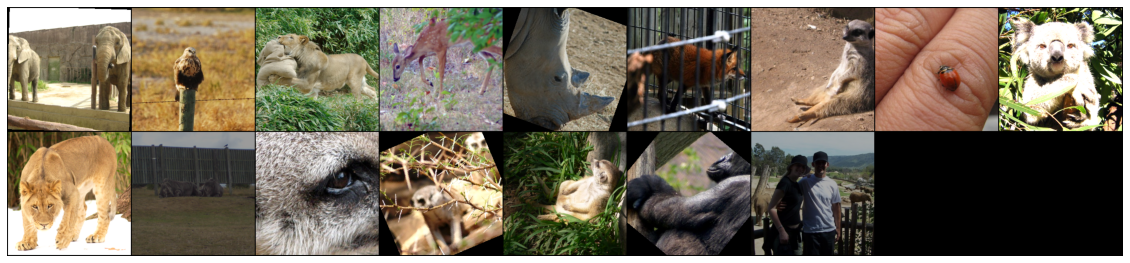

In [71]:
sample_inputs, _ = next(iter(loader_train))
print(sample_inputs.shape)
fixed_input = sample_inputs[:16, :, :, :]

print(fixed_input.shape)

img = make_grid(denorm(fixed_input), nrow=9 ,padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,150))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [78]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out
    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [79]:
print(ResNet(ResidualBlock))

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
        (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(16, 16, ke

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [81]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)
                

cuda:0


Total number of parameters is: 11204164
Epoch: 0, Iteration 0, loss = 4.9884
Epoch: 0, Iteration 10, loss = 3.1950
Epoch: 0, Iteration 20, loss = 3.6286
Epoch: 0, Iteration 30, loss = 2.9159
Epoch: 0, Iteration 40, loss = 3.3453
Epoch: 0, Iteration 50, loss = 2.7776
Epoch: 0, Iteration 60, loss = 3.5679
Epoch: 0, Iteration 70, loss = 4.9967
Epoch: 0, Iteration 80, loss = 3.7460
Epoch: 0, Iteration 90, loss = 2.8751
Epoch: 0, Iteration 100, loss = 3.3764
Epoch: 0, Iteration 110, loss = 3.1855
Epoch: 0, Iteration 120, loss = 3.4277
Epoch: 0, Iteration 130, loss = 2.7223
Epoch: 0, Iteration 140, loss = 2.9047
Epoch: 0, Iteration 150, loss = 2.8738
Epoch: 0, Iteration 160, loss = 2.5214
Epoch: 0, Iteration 170, loss = 2.4234
Epoch: 0, Iteration 180, loss = 3.4546
Epoch: 0, Iteration 190, loss = 3.6796
Epoch: 0, Iteration 200, loss = 3.1225
Epoch: 0, Iteration 210, loss = 2.5793
Epoch: 0, Iteration 220, loss = 2.8924
Epoch: 0, Iteration 230, loss = 2.5922
Epoch: 0, Iteration 240, loss = 2.6

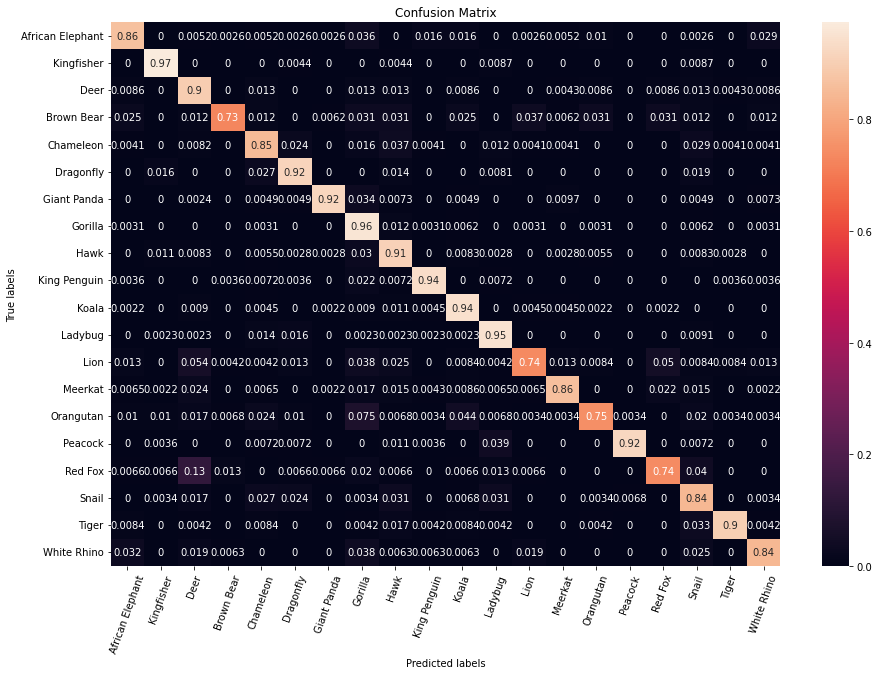

Predicted label ['Chameleon']
True label ['Hawk']
Corresponding images are shown below


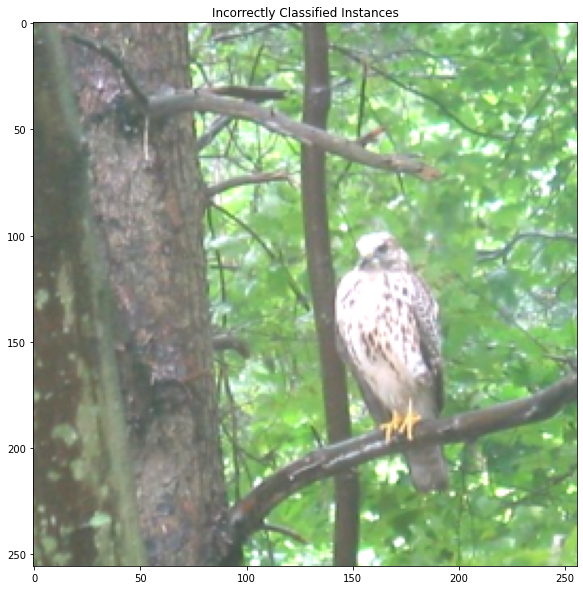

In [82]:
# define and train the network
model = MyResNet()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_part(model, optimizer, epochs = 10)

# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1677 / 2000 correct of val set (83.85)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


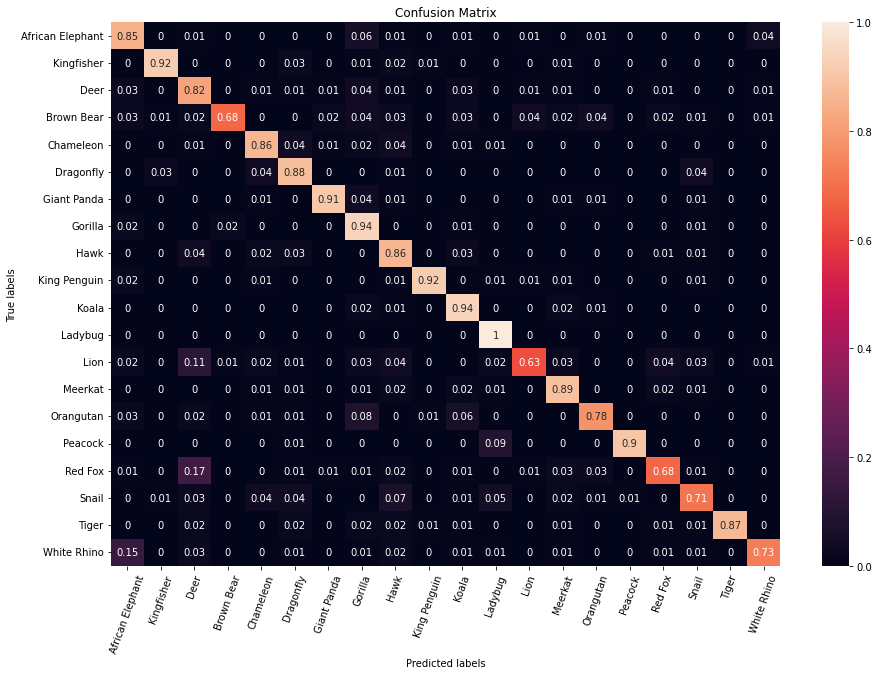

Predicted label ['African Elephant' 'Ladybug' 'Red Fox' 'Gorilla']
True label ['White Rhino' 'King Penguin' 'Lion' 'Chameleon']
Corresponding images are shown below


0.8385

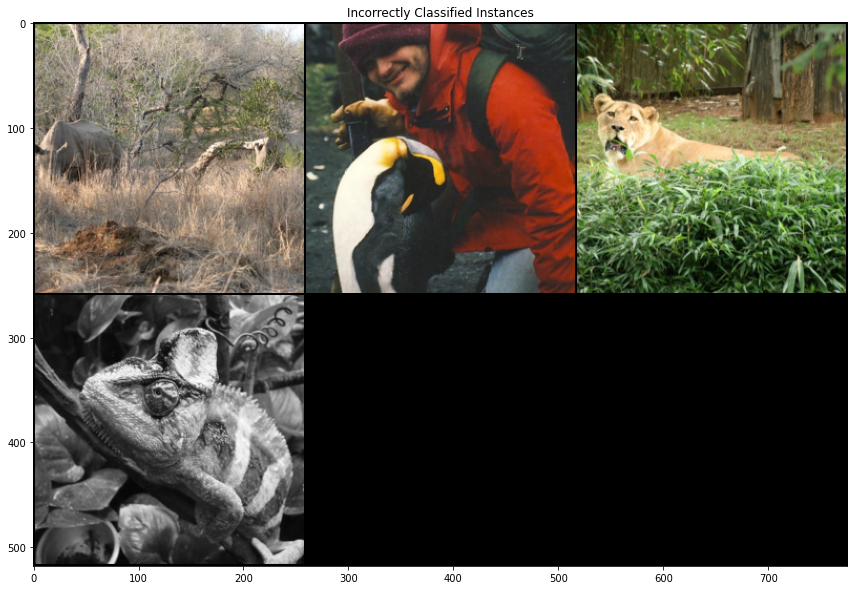

In [83]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

Best strategy in this case would be doing a grid search on a large set of parameters and then conclude which works the best. In my case I used manual search because executing a big grid search could consume a large amount of computing resourses available. Manual search involved dealing with parameters one by one and seeing which values makes logical and experimental sense here. For example in case of batch_size, I thought of keeping a low value of 16 because this would add more noise to the network, which will act as a regularizor and prevent overfitting. Similarily for learning rate having a lower learning rate slowed down the learning process a lot, a higher learning rate proved to be quite beneficial in pacing up the learning process.


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

There are multiple thigns that helped to improve the baseline performace:

1) Data Augmentation : One of the changes that had the major impact on the test accuracy was data augmentation, which involved random crop, centre crop, changing brightness, flipping the image. In my case i increased the train set by around 3 times. Data Augmentation helped here because of the variability in the images in the dataset. For instance there are several cases where the desired object is only present in the small part of the image and the rest of the part just acts as a noise, doing random crop and centre crop here helps us to remove background noise in many cases. Similarily changing brightness helps us in introducing more noise to our dataset making the network more robust to these changes.

2) Model Architecture : I removed the first two layers from the given architecture so instead of having 16 output channels in the first layer 

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

ANSWER HERE

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [66]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



In [67]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

AttributeError: 'ResNet' object has no attribute 'layer1'

<Figure size 432x288 with 0 Axes>

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()